In [32]:
from functions import *

In [85]:
n = 7
T = 0.1
t_max = 20
interpolator_kind = 'cubic'

In [86]:
def loss_ra(ramp_up_schedule, n, T, t_max, interpolator_kind='linear'):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    
    n_random_models = 1

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return -delta_avg

Initial spectral gap =  0.0266


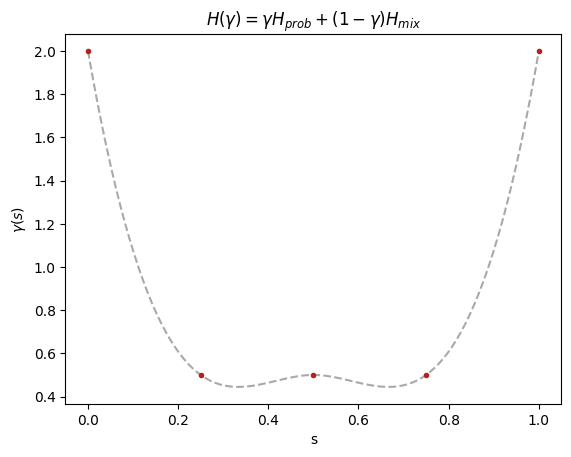

In [87]:
f_max = 2
ramp_up_schedule_init = np.concatenate([np.linspace(f_max, 0.5, 2), np.ones(1)*0.5])

loss_init = loss_ra(ramp_up_schedule_init, n, T, t_max, interpolator_kind=interpolator_kind)
print('Initial spectral gap = ', -loss_init.round(4))

schedule_init = get_symmetric_schedule(ramp_up_schedule_init) # mirror and append the ramp up schedule
plot_schedule(schedule_init, get_schedule_interpolator(schedule_init, interpolator_kind))

Optimized spectral gap =  0.0587


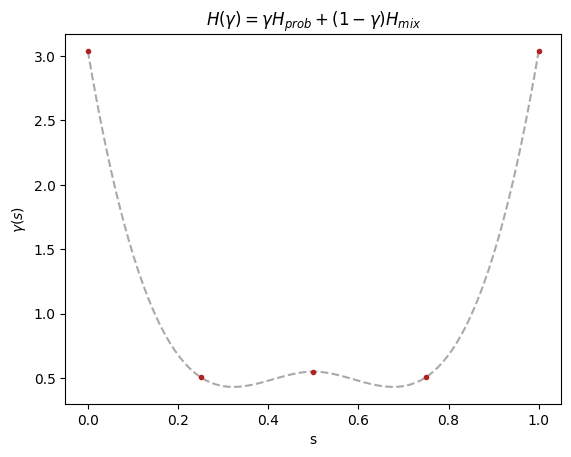

In [88]:
res = minimize(loss_ra, 
               ramp_up_schedule_init, 
               args=(n, T, t_max, interpolator_kind),
               method='COBYLA',
               options={"disp":True, "maxiter":400})  

loss_opt = loss_ra(res.x, n, T, t_max, interpolator_kind=interpolator_kind)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule(res.x)
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, interpolator_kind)) 

Optimized spectral gap =  0.1355


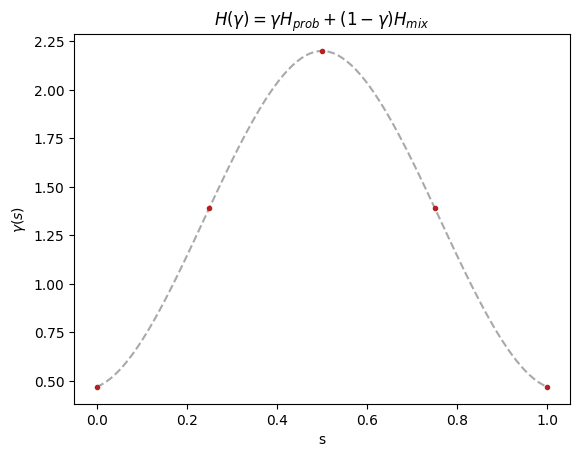

In [83]:
res_finetuned = minimize(loss_ra, 
                         res.x, 
                         args=(n, T, t_max, interpolator_kind),
                         method='L-BFGS-B',
                         options={"disp":True, "maxiter":200})

loss_finetuned = loss_ra(res_finetuned.x, n, T, t_max, interpolator_kind=interpolator_kind)
print('Optimized spectral gap = ', -loss_finetuned.round(4))

schedule_finetuned = get_symmetric_schedule(res_finetuned.x)
plot_schedule(schedule_finetuned, get_schedule_interpolator(schedule_finetuned, interpolator_kind)) 

In [84]:
# ra_exp = {'n': n,
#           'T': T,
#           'interpolator_kind': interpolator_kind,
#           't_max': t_max,
#           'schedule_init': schedule_init.tolist(),
#           'schedule_opt': schedule_opt.tolist(),
#           'schedule_finetuned': schedule_finetuned.tolist(),
#           'loss_init': loss_init,
#           'loss_opt': loss_opt,
#           'loss_finetuned': loss_finetuned,
#           'first_optimizer': 'COBYLA',
#           'second_optimizer': 'L-BFGS-B',
#           'n_random_models': 1
#           }

# save_in_json(ra_exp, f'n{n}_{interpolator_kind}_cobyla_lbfgsb.json')